## ***Activation Functions***

### **The ReLU (Rectified Linear Unit)**

The **ReLU (Rectified Linear Unit)** activation function is one of the most widely used nonlinearities in modern neural networks.  
It introduces non-linearity while being simple and computationally efficient.

---

##### **Mathematical Definition**

$$
f(x) = \max(0, x)
$$

or equivalently,

$$
f(x) =
\begin{cases}
x, & \text{if } x > 0 \\
0, & \text{if } x \le 0
\end{cases}
$$

---

##### **Derivative (for Backpropagation)**

$$
f'(x) =
\begin{cases}
1, & \text{if } x > 0 \\
0, & \text{if } x \le 0
\end{cases}
$$


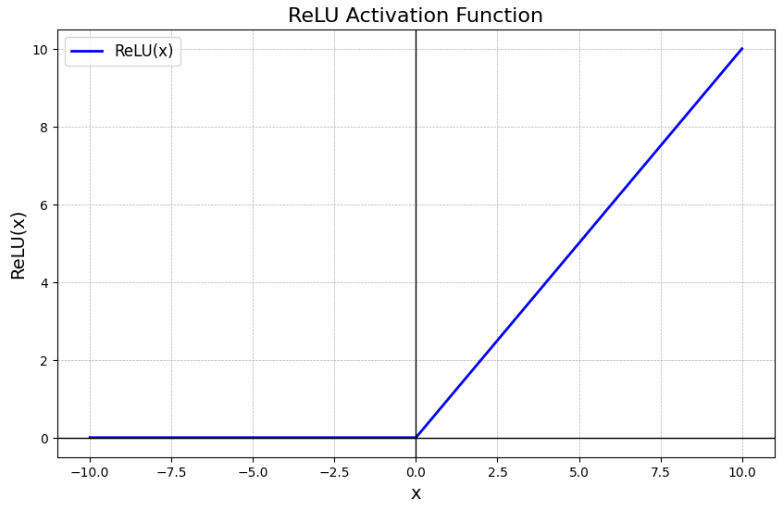

In [1]:
inputs = [ 0 , 2, -1 , 3.3 ,-2.7 , 1.1 , 2.2  ]
output = []

for i in inputs :
    if i < 0 :
        output.append(0)
    else :
        output.append(i)

output

[0, 2, 0, 3.3, 0, 1.1, 2.2]

In [2]:
output = []
for i in inputs :
    output.append(max(0, i))

output

[0, 2, 0, 3.3, 0, 1.1, 2.2]

In [ ]:
# Creating an object of relu 

import numpy as np


class Activation_ReLU :

    def forward (self , inputs ) -> None:
        self.outputs = np.maximum ( 0 , inputs )
        return self.outputs

### **Softmax Function**

---

The **Softmax** function converts a vector of raw scores (*logits*) into probabilities that sum to 1.  
It’s typically used in the **output layer** of a neural network for **multi-class classification**.

---

##### **Formula**

For a vector **z** = [ \( z_1, z_2, \ldots, z_n \) ]:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

Where:

- \( e^{z_i} \) magnifies larger logits exponentially.  
- The denominator normalizes the values so they represent probabilities.

---

##### **Properties**

- **Output range:** (0, 1)  
- **Sum of all outputs = 1**

$$
\sum_i \text{Softmax}(z_i) = 1
$$

- Highlights the largest score, suppresses smaller ones.

---

##### **Numerical Stability Tip**

To avoid overflow in \( e^{z_i} \), subtract the maximum value before exponentiation:

$$
\text{Softmax}(z_i) = \frac{e^{z_i - \max(z)}}{\sum_{j=1}^{n} e^{z_j - \max(z)}}
$$

This doesn’t change the result but prevents large exponentials.


In [ ]:
import numpy as np

# Step 1 coding Exponentiation 
numbers = [ 4.8 , 1.21 , 2.385 ]
ex_numbers = np.exp ( numbers )

# Step 2 Normalizing values
sum = np.sum ( ex_numbers)

# Step 3 Dividing each value by this value to get softmax
softmax = ex_numbers / sum


print(softmax)
## From this output we can clearly see that first value has the highest probability
# the entire data is converted to a probability distribution. and the sum of all these value will = 1 

np.sum ( softmax)

[0.89528266 0.02470831 0.08000903]


0.9999999999999999

In [20]:
"""
Minor improvements : 

        Calculating exponents is a tedious task, and also value get out of hand too quickly
        To solve this , we subtract all values by largest value
        This makes the largest value 0, and rest negative.
        Exponent of negative numbers lie between (0,1) so this makes them easy to deal with. 
        
        
        ###  THIS DOES NOT AFFECT THE OUTPUT ### 
        
"""

numbers2 = numbers - np.max (numbers)

ex_numbers2  = np. exp ( numbers2 )
sum2 = np.sum ( ex_numbers2)

softmax2 = ex_numbers2 / sum2

print(f"First Output  : {softmax2}" , f"\nSecond Output : {softmax}")


First Output  : [0.89528266 0.02470831 0.08000903] 
Second Output : [0.89528266 0.02470831 0.08000903]


In [22]:
## Improving using Numpy 
import numpy as np

layer_output = [[ 4.8 , 1.21  , 2.385 ],
                 [ 8.9 , -1.81 , 0.2   ],
                 [1.41 , 1.051 , 0.026 ]]


exp_values = np.exp(layer_output)


norm_exp_output = exp_values / np.sum (exp_values , axis=1 , keepdims=True)

print(norm_exp_output) 


print(np.sum(norm_exp_output , axis=1 ,  keepdims=True))



[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
[[1.]
 [1.]
 [1.]]


Creating Object 


In [ ]:

class Activation_Softmax :

    def forward (self  , inputs ):
        
        inputs -= np.max ( inputs , axis= 1 , keepdims=True)
        self.output = np.exp (inputs)  / np.sum ( inputs , axis= 1 , keepdims=True)


